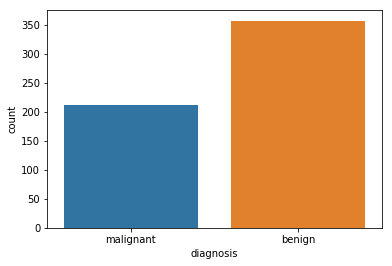

In [94]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import math
import warnings

breast_cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data = breast_cancer['data'],columns = breast_cancer['feature_names'])

# adding the target variable
df['diagnosis'] = breast_cancer['target']

# target_names: list: The names of target classes.
#print(breast_cancer['target_names']) # 0 is malignant and 1 is benign

# here we will change the labels so that malignant is the positive class
df['diagnosis'] = df['diagnosis'].replace({0:1,1:0})

df['diagnosis'].value_counts()

# count plot of the number of benign and malignant cases
sns.countplot(df['diagnosis'].map({0:'benign',1:'malignant'}));


In [95]:
# ========== Part 2: putting the data into matrices, splitting the data into train/test sets and Feature Normalization
X = df.iloc[:,:30].values
y = df.iloc[:,30].values

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Feature Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

# One-hot encoding of the y-target labels
X = X_train_std
T = np.zeros((len(y_train),2))

for i in range(len(y_train)):
    if y_train[i] == 0:
        T[i,0] = 1
    elif y_train[i] == 1:
        T[i,1] = 1
        

Loss Function value:  295.63729328225753
Loss Function value:  270.3082410615038
Loss Function value:  250.76210628487487
Loss Function value:  234.81138085001896
Loss Function value:  221.54445973117708
Loss Function value:  210.40093051904995
Loss Function value:  200.96808024064654
Loss Function value:  192.9239627644814
Loss Function value:  186.01337199239467
Loss Function value:  180.03292406184283
Loss Function value:  174.81995856791724
Loss Function value:  170.24386761204295
Loss Function value:  166.19928326029645
Loss Function value:  162.6007439356485
Loss Function value:  159.37853281525707
Loss Function value:  156.47543503733036
Loss Function value:  153.84420896247747
Loss Function value:  151.44560930938854
Loss Function value:  149.246835630722
Loss Function value:  147.22030836851667
Loss Function value:  145.34269739547068
Loss Function value:  143.59414552441672
Loss Function value:  141.95764295766938
Loss Function value:  140.41851893168416
Loss Function value: 

Loss Function value:  23.740396879244162
Loss Function value:  23.634146331676767
Loss Function value:  23.52909911184343
Loss Function value:  23.425232241241652
Loss Function value:  23.322523476661484
Loss Function value:  23.22095127101931


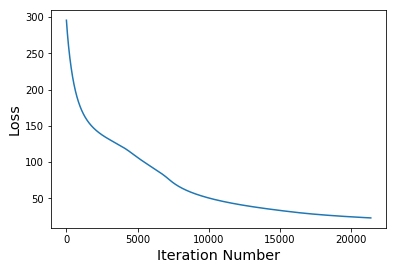

In [96]:
# ========== Part 3: here we will build a NeuralNetwork and implement forward and backpropagation

def sigmoid(Z):
    return (1 / (1 + np.exp(-Z)))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1,keepdims = True)

class NeuralNetwork(object):
    def model(self,X,T):
        input_dim = X.shape[1]
        hidden_nodes = 8
        classes = len(np.unique(y))
        epochs = 100000
        alpha = 10e-6
        precision = 10e-4
        costs = []
        
        # Initializing weight matrices and bias vectors with numbers drawn randomly from 
        # a uniform distribution over 0 and 1
        np.random.seed(0)
        W1 = np.random.rand(input_dim,hidden_nodes)
        b1 = np.random.rand(hidden_nodes)
        W2 = np.random.rand(hidden_nodes,classes)
        b2 = np.random.rand(classes)
        
        for i in range(epochs):
            #forward propagation
            A = sigmoid(X.dot(W1) + b1) # A is sigmoid of Z
            Y = softmax(A.dot(W2) + b2) # Y is softmax of Z2
            
            # backward pass
            delta2 = Y - T
            delta1 = (delta2).dot(W2.T) * A * (1 - A)
            
            W2 -= alpha * A.T.dot(delta2)
            b2 -= alpha * (delta2).sum(axis=0)
            W1 -= alpha * X.T.dot(delta1)
            b1 -= alpha * (delta1).sum(axis=0)
            
            # calculate the loss on every iteration
            loss = np.sum(-T * np.log(Y))
            # saving the loss function values across all training iterations
            costs.append(loss)
            
            if i >= 1:
                cost_new = costs[i]
                cost_prev = costs[i-1]
                if abs(cost_new-cost_prev)<precision:
                    break
            
            if i % 100 == 0:
                print('Loss Function value: ', loss)
            
        return W1,b1,W2,b2,costs,Y
        
W1,b1,W2,b2,costs,Y = NeuralNetwork().model(X,T)

plt.plot(costs)
plt.xlabel('Iteration Number',fontsize = 'x-large')
plt.ylabel('Loss',fontsize = 'x-large')
plt.show()


In [97]:
# ========== Part 3: here we look at our predictions on the Training Data and compare them with the actual labels
# Our Y matrix is of the dimension (nr of samples X number of classes)
# each row represents the probabilities of each of the three classes, the predicted label will therefore be the
# index of the max value in each row

y_predicted = np.argmax(Y,axis=1)
correct= y_predicted == y_train

print('The Neural Network has an accuracy on the Training Data of \n')
print("{:.2f}".format(correct.mean()*100) + str("%"))


The Neural Network has an accuracy on the Training Data of 

98.83%


In [98]:
# ========== Part 4: here we look at the performance on the Testing Data
X = X_test_std

A = sigmoid(X.dot(W1) + b1) #Sigmoid of Z
Y = softmax(A.dot(W2) + b2) #softmax of Z2

y_predicted = np.argmax(Y,axis=1)
correct = y_predicted == y_test

print('The Neural Network has an accuracy on the Testing Data of \n')
print("{:.2f}".format(correct.mean()*100) + str("%"))

The Neural Network has an accuracy on the Testing Data of 

95.80%
